In [1]:
import h5py
import galaxychop as gchop
import uttr
import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Leo la galaxia

In [2]:
gal = gchop.read_hdf5("../galaxy-chop/tests/datasets/gal394242.h5")

In [3]:
gal.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,0.045630,0.023792,-0.036427,10.773575,-6.878906,-20.425400,0.0,-195699.620206,290.293111,-195409.327095,-0.736533,0.539572,-0.570209
1,stars,0,9.745897e+05,-0.094469,0.054867,0.006084,20.282349,8.661957,-7.947495,0.0,-196176.962277,274.782915,-195902.179362,-0.488759,-0.627390,-1.931126
2,stars,0,6.935776e+05,-0.172213,-0.000511,0.047600,-14.897980,6.957092,-10.818886,0.0,-195152.120168,193.699612,-194958.420557,-0.325631,-2.572295,-1.205710
3,stars,0,1.070959e+06,-0.081766,-0.116694,0.177133,-8.665253,-4.337433,5.506927,0.0,-194695.767625,62.113089,-194633.654536,0.125676,-1.084623,-0.656530
4,stars,0,6.013803e+05,0.020734,0.023444,0.101449,23.508469,-7.842865,-3.754723,0.0,-195703.942688,314.128285,-195389.814402,0.707622,2.462754,-0.713749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272642,gas,2,1.429845e+06,44.246486,-253.661747,-240.888732,-44.183670,-152.597656,69.413803,0.0,-17314.963254,15028.258726,-2286.704528,-54366.682527,7572.031389,-17959.617014
272643,gas,2,1.436841e+06,-37.380023,-250.988099,-125.929722,-69.019005,-67.030350,35.370728,0.0,-20910.620132,5253.889589,-15656.730543,-17318.744973,10013.702701,-14817.352798
272644,gas,2,1.690580e+06,16.542737,-267.716920,-226.546536,-61.974457,-122.167450,98.398193,0.0,-17358.735183,14223.961789,-3134.773394,-54019.473934,12412.323127,-18612.594663
272645,gas,2,1.210975e+06,-220.426329,79.421367,46.584759,-96.530602,18.881409,-45.233887,0.0,-23427.833806,5860.384564,-17567.449242,-4472.122980,-14467.594426,3504.632690


## Centrado y alinamiento de la galaxia

In [4]:
gal = gchop.center(gal)

In [5]:
gal = gchop.star_align(gal, r_cut=0.1*297.470)

In [6]:
circ = gchop.utils.jcirc(gal)
circ

JCirc(normalized_star_energy=array([-0.99509357, -0.99760334, -0.99279739, ..., -0.08560649,
       -0.07196383, -0.06652457]), normalized_star_Jz=array([-1.43029238e-05,  2.56483398e-05, -6.00755995e-05, ...,
        1.32273677e-01, -3.66232597e-01,  1.15566328e-01]), eps=array([-0.10471703,  0.38442538, -0.29961715, ...,  0.2617479 ,
       -0.63015436,  0.19263783]), eps_r=array([0.71263549, 0.94940638, 0.44326879, ..., 0.04460243, 0.14290206,
       0.06652125]), x=array([-1.        , -0.95927071, -0.9004535 , -0.85024711, -0.80186797,
       -0.75018146, -0.70010322, -0.65051785, -0.60334024, -0.55155718,
       -0.50014295, -0.45108036, -0.40008864, -0.35025144, -0.30024502,
       -0.25002993, -0.20024929, -0.1520224 , -0.10090362, -0.09799188,
       -0.09234462, -0.08518955, -0.08066537, -0.07534976, -0.07314983,
       -0.06528621, -0.06091522, -0.05699285, -0.05453096, -0.04595442,
       -0.0423004 , -0.03511098, -0.03243656, -0.02540905, -0.02381068,
       -0.01809662, -0

# Descomposicion models Data Frame

In [7]:
df = pd.read_pickle('df_stars_gal394242_rvir.pkl')

In [8]:
df

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,...,lab_th,lab_ab,lab_cr,lab_km,lab_km3,lab_km4,lab_gmm,lab_gmm3,lab_gmm4,lab_agmm
0,stars,0,5.224283e+05,-0.053393,-0.063512,-0.261071,6.017590,22.533272,-6.051982,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,stars,0,9.745897e+05,-0.160266,-0.127742,-0.178286,21.924235,8.289647,-0.418943,0.0,...,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0
2,stars,0,6.935776e+05,-0.255175,-0.165614,-0.198094,-9.574002,7.298885,15.571255,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,stars,0,1.070959e+06,-0.233303,-0.256464,-0.370506,-9.678900,-5.458488,-0.866013,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,stars,0,6.013803e+05,-0.075262,-0.200221,-0.282568,16.644463,8.046805,-16.925347,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37388,stars,0,9.867470e+05,135.738559,-160.160626,-15.369098,-56.741920,57.947940,121.877589,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
37389,stars,0,8.290853e+05,14.748290,15.584324,-5.206648,-6.194351,263.651947,313.783409,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
37390,stars,0,1.004103e+06,16.885028,56.265101,-2.875864,-43.605196,304.321445,11.364916,0.0,...,0.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0
37391,stars,0,1.526682e+06,270.481924,-80.307674,15.246717,-89.287180,-51.203767,-23.223115,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0


# Plots dynamical space

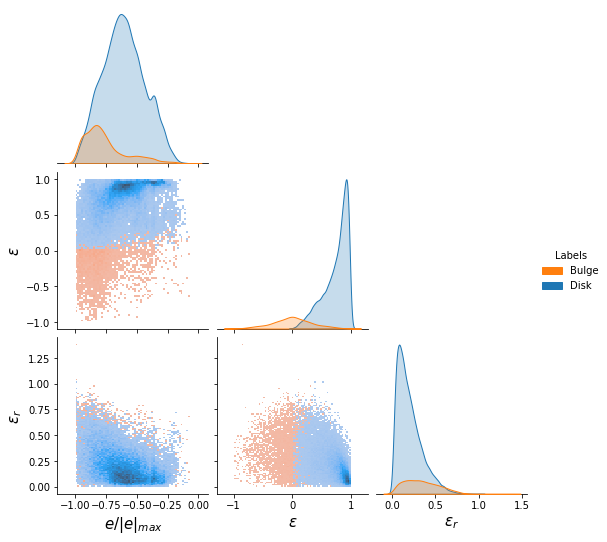

In [27]:
g = gal.plot.circ_pairplot(attributes=['normalized_star_energy', 'eps','eps_r'],
                           labels=df.lab_ab, lmap={0: 'Bulge', 1: 'Disk'}, palette=['C1','C0'],
                           corner=True,)
#g.map_lower(sns.kdeplot, levels=10, color=".2")


#g.axes[0][0].get_yaxis().set_visible(True)
#g.axes[0][0].set_ylabel(r'$e / |e|_{max}$')
g.axes[1][0].get_yaxis().set_visible(True)
g.axes[1][0].set_ylabel(r'$\epsilon$', size=15)
g.axes[2][0].get_yaxis().set_visible(True)
g.axes[2][0].set_ylabel(r'$\epsilon_r$', size=15)

g.axes[2][0].get_xaxis().set_visible(True)
g.axes[2][0].set_xlabel(r'$e / |e|_{max}$', size=15)
g.axes[2][1].get_xaxis().set_visible(True)
g.axes[2][1].set_xlabel(r'$\epsilon$', size=15)
g.axes[2][2].get_xaxis().set_visible(True)
g.axes[2][2].set_xlabel(r'$\epsilon_r$', size=15)



#plt.savefig('gchop_plots/pairplot_abadi.pdf') 

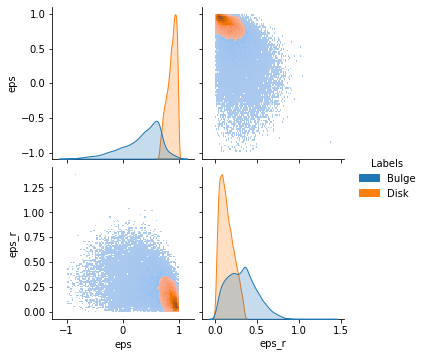

In [10]:
g = gal.plot.circ_pairplot(attributes=['eps','eps_r'],labels=df.lab_gmm, lmap={0: 'Bulge', 1: 'Disk'})
#g.map_lower(sns.kdeplot, levels=3, color=".2")

## envolvente Jcirc

/home/anto/.virtualenvs/galchop/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '$y$')

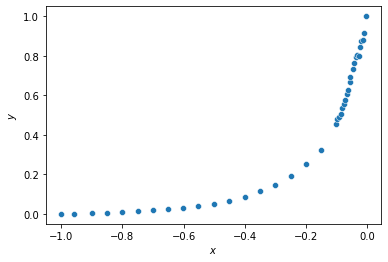

In [11]:
ax = sns.scatterplot(circ.x,circ.y)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

## energy vs Jz

<AxesSubplot:xlabel='total_energy', ylabel='Jz'>

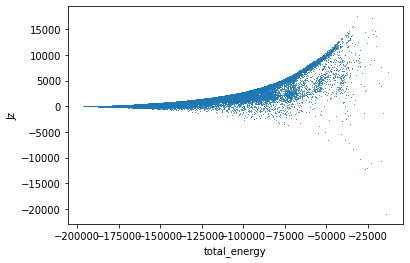

In [12]:
gal.plot.scatter("total_energy", "Jz", ptypes=['stars'], marker='.', linewidth=0, s=4 )

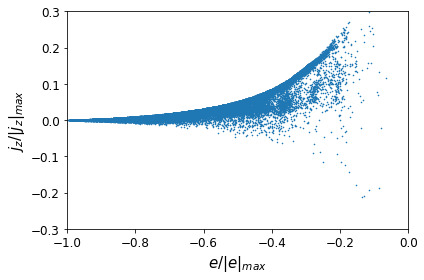

In [13]:
g=gal.plot.circ_scatter("normalized_star_energy", "normalized_star_Jz", 
                      marker='.', linewidth=0, s=10
        )
g.set_xlim(-1,0)
g.set_ylim(-0.3,0.3)
g.set_xlabel(r'$e / |e|_{max}$', fontsize=15)
g.set_ylabel(r'$j_z / |j_z|_{max}$', fontsize=15)
g.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
#plt.savefig('gchop_plots/E_vs_Jz_stars.png', dpi=100)

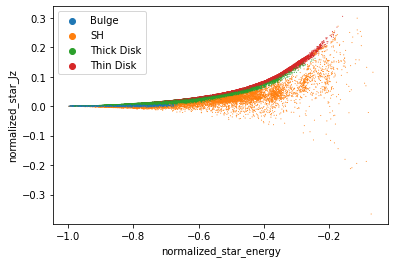

In [14]:
g=gal.plot.circ_scatter("normalized_star_energy", "normalized_star_Jz", 
                      marker='.',labels=df.lab_agmm, lmap={0: 'SH', 1: 'Bulge', 2: 'Thin Disk', 3: 'Thick Disk'},
                      linewidth=0, s=4
        )
g.legend()

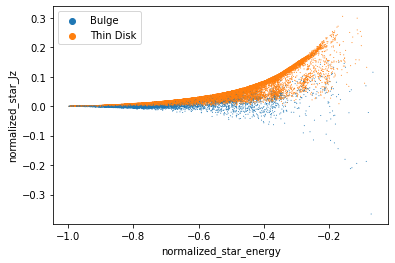

In [15]:
g=gal.plot.circ_scatter("normalized_star_energy", "normalized_star_Jz", 
                      marker='.',labels=df.lab_ab, lmap={0: 'Bulge', 1: 'Thin Disk'},
                      linewidth=0, s=4
        )
g.legend()

<AxesSubplot:xlabel='m', ylabel='Density'>

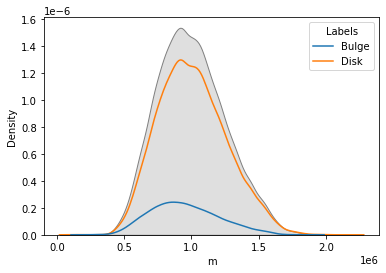

In [16]:
gal.plot.kde("m", ptypes=['stars'], color='gray', fill=True)
gal.plot.kde("m", ptypes=['stars'], labels = df.lab_ab, lmap={0: 'Bulge', 1: 'Disk'})

## Eps

Text(0.5, 0, '$E_{star}/E_{tot}$')

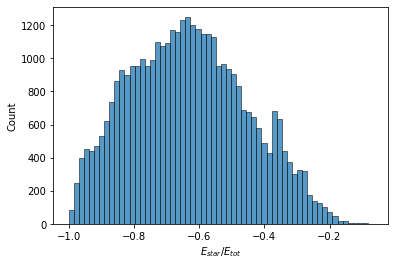

In [17]:
ax = sns.histplot(circ.normalized_star_energy)
ax.set_xlabel(r"$E_{star}/E_{tot}$")

<AxesSubplot:xlabel='eps', ylabel='Density'>

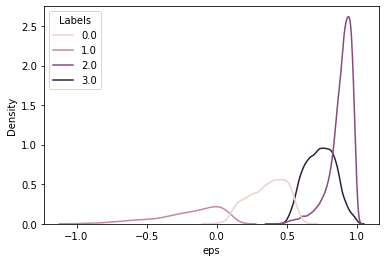

In [18]:
gal.plot.circ_kde("eps",labels=df.lab_km4)

<AxesSubplot:xlabel='eps', ylabel='Density'>

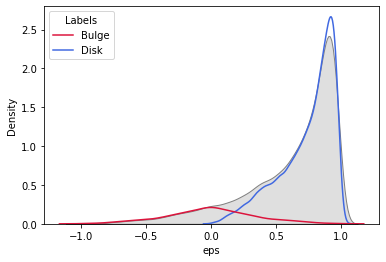

In [19]:
gal.plot.circ_kde("eps", color='gray', fill=True)
gal.plot.circ_kde("eps",labels=df.lab_ab, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'])

#plt.savefig('gchop_plots/eps_stars.png', dpi=100)

<AxesSubplot:xlabel='eps', ylabel='Count'>

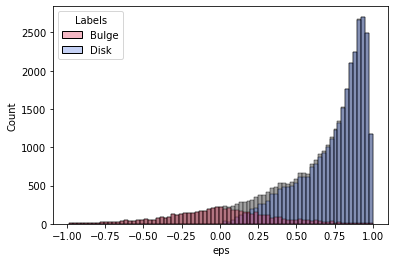

In [20]:
gal.plot.circ_hist("eps", color='gray', fill=True)
gal.plot.circ_hist("eps",labels=df.lab_ab, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'],alpha=0.3)


## Plots eps all models

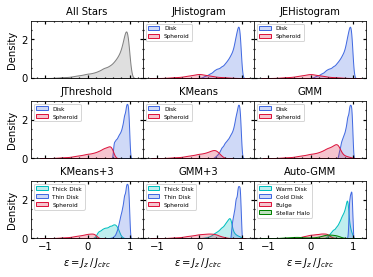

In [21]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4,wspace=0)

gal.plot.circ_kde("eps", color='gray', fill=True, ax=ax1,legend=False)
gal.plot.circ_kde("eps",labels=df.lab_ab, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'], ax=ax2, fill=True)
gal.plot.circ_kde("eps",labels=df.lab_cr, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'], ax=ax3, fill=True)
gal.plot.circ_kde("eps",labels=df.lab_th, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'], ax=ax4, fill=True)
gal.plot.circ_kde("eps",labels=df.lab_km, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'], ax=ax5, fill=True)
gal.plot.circ_kde("eps",labels=df.lab_gmm, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'], ax=ax6, fill=True)
gal.plot.circ_kde("eps",labels=df.lab_km3, palette=['crimson','royalblue', 'c'], ax=ax7, fill=True)
gal.plot.circ_kde("eps",labels=df.lab_gmm3, palette=['crimson','royalblue', 'c'], ax=ax8, fill=True)
gal.plot.circ_kde("eps",labels=df.lab_agmm, palette=['g', 'crimson','royalblue', 'c'], ax=ax9, fill=True)

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax5.set_ylabel("")
ax6.set_ylabel("")
ax7.set_xlabel("$\epsilon = J_z \, / \,J_{circ}$", fontsize=10)
ax8.set_xlabel("$\epsilon = J_z \, / \,J_{circ}$", fontsize=10)
ax9.set_xlabel("$\epsilon = J_z \, / \,J_{circ}$", fontsize=10)

#----------- minor ticks
ax1.minorticks_on() ; ax1.tick_params(labelsize=10)
ax1.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax1.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax2.minorticks_on() ; ax2.tick_params(labelsize=10)
ax2.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax2.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax3.minorticks_on() ; ax3.tick_params(labelsize=10)
ax3.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax3.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax4.minorticks_on() ; ax4.tick_params(labelsize=10)
ax4.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax4.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax5.minorticks_on() ; ax5.tick_params(labelsize=10)
ax5.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax5.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax6.minorticks_on() ; ax6.tick_params(labelsize=10)
ax6.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax6.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax7.minorticks_on() ; ax7.tick_params(labelsize=10)
ax7.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax7.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax8.minorticks_on() ; ax8.tick_params(labelsize=10)
ax8.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax8.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax9.minorticks_on() ; ax9.tick_params(labelsize=10)
ax9.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax9.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
#------------------------------

#Title
ax1.set_title('All Stars', fontsize=10)
ax2.set_title('JHistogram', fontsize=10)
ax3.set_title('JEHistogram', fontsize=10)
ax4.set_title('JThreshold', fontsize=10)
ax5.set_title('KMeans', fontsize=10)
ax6.set_title('GMM', fontsize=10)
ax7.set_title('KMeans+3', fontsize=10)
ax8.set_title('GMM+3', fontsize=10)
ax9.set_title('Auto-GMM', fontsize=10)

# Put a legend below current axis
ax2.legend(title='', loc='upper left', fontsize='xx-small', labels=['Disk', 'Spheroid'])
ax3.legend(title='', loc='upper left', fontsize='xx-small', labels=['Disk', 'Spheroid'])
ax4.legend(title='', loc='upper left', fontsize='xx-small', labels=['Disk', 'Spheroid'])
ax5.legend(title='', loc='upper left', fontsize='xx-small', labels=['Disk', 'Spheroid'])
ax6.legend(title='', loc='upper left', fontsize='xx-small', labels=['Disk', 'Spheroid'])
ax7.legend(title='', loc='upper left', fontsize='xx-small', labels=['Thick Disk', 'Thin Disk', 'Spheroid'])
ax8.legend(title='', loc='upper left', fontsize='xx-small', labels=['Thick Disk', 'Thin Disk', 'Spheroid'])
ax9.legend(title='', loc='upper left', fontsize='xx-small', labels=['Warm Disk', 'Cold Disk', 'Bulge', 'Stellar Halo'])

#plt.savefig('eps_full.png', dpi=200)

In [22]:
# Put a legend below current axis
fig.legend(title='Components', bbox_to_anchor=(-0.6, 2.3), loc='upper left', fontsize='x-small', 
           labels=['Cold Disk', 'Warm Disk','C', 'D'], ncol = 4)

<AxesSubplot:xlabel='eps', ylabel='Density'>

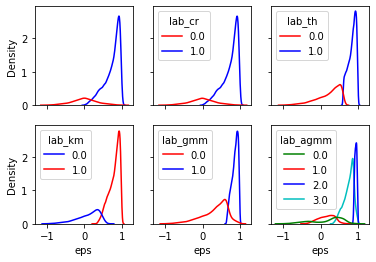

In [23]:
data = {'eps': circ.eps, 'lab_km': df.lab_km, 'lab_cr': df.lab_cr, 'lab_ab': df.lab_ab, 'lab_th': df.lab_th,
        'lab_gmm': df.lab_gmm, 'lab_agmm': df.lab_agmm}
dfc = pd.DataFrame(data)

fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, sharex=True, sharey=True)
#sns.histplot(data=df, x="eps", hue="lab_km", ax=ax1)

sns.kdeplot(data=dfc, x="eps", hue="lab_ab", ax=ax1, palette=['r', 'b'],legend=False)
sns.kdeplot(data=dfc, x="eps", hue="lab_cr", ax=ax2, palette=['r', 'b'])
sns.kdeplot(data=dfc, x="eps", hue="lab_th", ax=ax3, palette=['r', 'b'])
sns.kdeplot(data=dfc, x="eps", hue="lab_km", ax=ax4, palette=['b', 'r'])
sns.kdeplot(data=dfc, x="eps", hue="lab_gmm", ax=ax5, palette=['r', 'b'])
sns.kdeplot(data=dfc, x="eps", hue="lab_agmm", ax=ax6, palette=['g', 'r', 'b', 'c'])

# Bulge

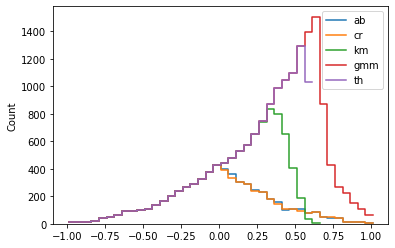

In [24]:
eps = circ.eps

mask_b_ab = np.where(df.lab_ab == 0)
#mask_d_ab = np.where(df.lab_ab == 1)
mask_b_th = np.where(df.lab_th == 0)
mask_b_cr = np.where(df.lab_cr == 0)
mask_b_km = np.where(df.lab_km == 0)
mask_b_gmm = np.where(df.lab_gmm == 0)
mask_b_agmm = np.where((df.lab_agmm == 0) & (df.lab_agmm == 1))


sns.histplot(eps[mask_b_ab], binwidth=0.05, element='step', fill=False, label='ab')
sns.histplot(eps[mask_b_cr], binwidth=0.05, element='step', fill=False, label='cr')
sns.histplot(eps[mask_b_km], binwidth=0.05, element='step', fill=False, label='km')
sns.histplot(eps[mask_b_gmm], binwidth=0.05, element='step', fill=False, label='gmm')
sns.histplot(eps[mask_b_agmm], binwidth=0.05, element='step', fill=False, label='agmm')
sns.histplot(eps[mask_b_th], binwidth=0.05, element='step', fill=False, label='th')
plt.legend()

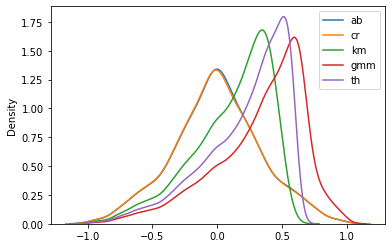

In [25]:
eps = circ.eps

mask_b_ab = np.where(df.lab_ab == 0)
#mask_d_ab = np.where(df.lab_ab == 1)
mask_b_th = np.where(df.lab_th == 0)
mask_b_cr = np.where(df.lab_cr == 0)
mask_b_km = np.where(df.lab_km == 0)
mask_b_gmm = np.where(df.lab_gmm == 0)
mask_b_agmm = np.where((df.lab_agmm == 0) & (df.lab_agmm == 1))


sns.kdeplot(eps[mask_b_ab], label='ab')
sns.kdeplot(eps[mask_b_cr], label='cr')
sns.kdeplot(eps[mask_b_km], label='km')
sns.kdeplot(eps[mask_b_gmm], label='gmm')
sns.kdeplot(eps[mask_b_agmm], label='agmm')
sns.kdeplot(eps[mask_b_th], label='th')
plt.legend()

# Disk

In [26]:
eps = circ.eps

mask_d_ab = np.where(df.lab_ab == 1)
mask_d_th = np.where(df.lab_th == 1)
mask_d_cr = np.where(df.lab_cr == 1)
mask_d_km = np.where(df.lab_km == 1)
mask_d_gmm = np.where(df.lab_gmm == 1)
mask_d_agmm = np.where((df.lab_agmm == 2) & (df.lab_agmm == 3))
